# Тестовое задание
 
В прикрепленном файле data_train.csv вам предоставлены почасовые данные потребления электроэнергии одного из предприятий (c 1.01.2019 по 8.09.2019). Постройте почасовой прогноз потребления с 9.09.2019 по 22.09.2019. В качестве метрики используйте RMSE. Оформите на языке Python в Jupyter Notebook выбор модели, подбор параметров и построение прогноза. Можно пользоваться любыми библиотеками. Также, предоставьте файл с прогнозами в формате csv. 

In [324]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from itertools import product
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
filterwarnings('ignore')

In [325]:
time_series = pd.read_csv('data_train_NNFormat.csv', index_col=['timestamp'], parse_dates=['timestamp'], dayfirst=True)
time_series.head()

,fact
timestamp,
2019-01-01 00:00:00,294.0
2019-01-01 01:00:00,292.0
2019-01-01 02:00:00,290.0
2019-01-01 03:00:00,293.0
2019-01-01 04:00:00,294.0


In [326]:
forecast_ts = pd.DataFrame({'timestamp':pd.date_range('2019-09-09', '2019-09-23', freq='1H', closed='left')})
forecast_ts.set_index('timestamp', inplace=True)
time_series = time_series.append(forecast_ts)

In [327]:
train_st, train_end = '20190603','20190825'
test_st, test_end = '20190826', '20190908'
# ts = ts[train_st:].diff(24)
# ts = ts.diff()
ts = time_series[train_st:].diff(1)
print(*sm.tsa.stattools.adfuller(ts.fact.dropna()), sep='\n')

-9.128466563383425
3.0677081578335823e-15
24
2326
{'1%': -3.4331645018756975, '5%': -2.8627833910976266, '10%': -2.5674319121464415}
24026.69120808947


In [364]:
def add_exog_features(ts, month_range=range(6, 10)):
    ts['month'] = ts.index.month
    ts['dayofweek'] = ts.index.dayofweek
    ts['hour'] = ts.index.hour
    month = pd.get_dummies(ts.month)
    month.columns=['month_' + str(i) for i in month_range]
    dayofweek = pd.get_dummies(ts.dayofweek)
    dayofweek.columns = ['dayofweek_' + str(i) for i in range(0, 7)]
    hour = pd.get_dummies(ts.hour)
    hour.columns = ['hour_' + str(i) for i in range(0, 24)]
    ts = pd.concat([ts, month, dayofweek, hour], axis=1)
    ts.drop(columns=['month', 'dayofweek', 'hour'], inplace=True)
    return ts

In [329]:
ts = add_exog_features(ts)
train_ts, test_ts = ts[:train_end].dropna(), ts[test_st:test_end].dropna()
exog_train, exog_test = train_ts.drop(columns=['fact']), test_ts.drop(columns=['fact'])

In [359]:
model212003 = arima_model

In [383]:
train_st, train_end = '20190101','20190908'
forecast_st, forecast_end = '20190909', '20190922'

train_ts = add_exog_features(time_series.diff(), range(1, 10))
train_ts, forecast_ts = train_ts[:train_end].dropna(), train_ts[forecast_st:]
exog_train, exog_forecast = train_ts.drop(columns=['fact']), forecast_ts.drop(columns=['fact'])



In [370]:
p, d, q, P, D, Q, S = 2, 1, 2, 0, 0, 3, 24
arima_model = sm.tsa.statespace.SARIMAX(train_ts.fact, order=(p, d, q), seasonal_order=(P, D, Q, S), 
                                        exog = exog_train).fit(maxiter=100)

<AxesSubplot:xlabel='timestamp'>

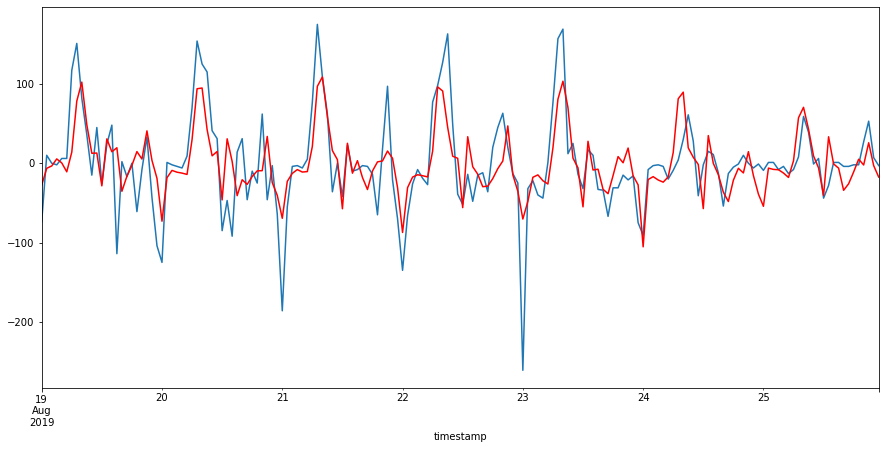

In [371]:
a, b = '20190819', '20190825'
plt.figure(figsize(15,7))
train_ts['arima'] = arima_model.fittedvalues
train_ts.fact[a:b].plot()
train_ts.arima.dropna()[a:b].plot(color='r')

37.052505922840275


<AxesSubplot:xlabel='timestamp'>

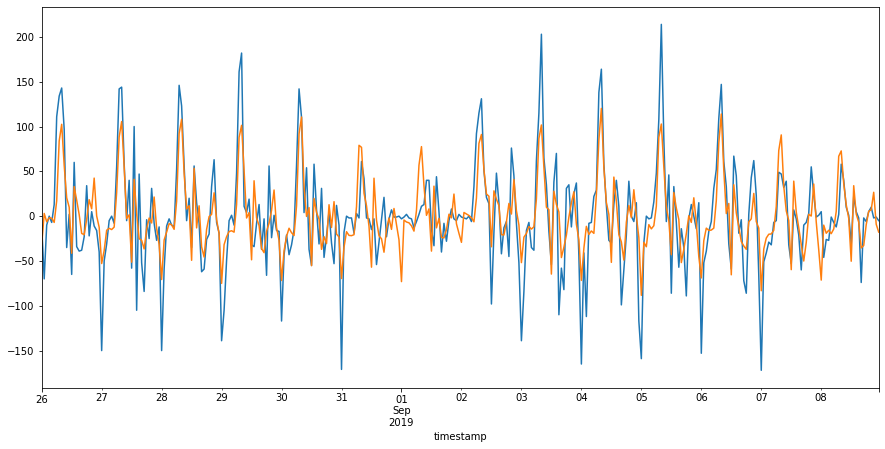

In [372]:
test_ts['arima'] = arima_model.predict(start='20190826', end='20190908230000', exog=exog_test)
print(mean_squared_error(test_ts.fact, test_ts.arima, squared=False))
test_ts.fact.plot()
test_ts.arima.plot()

139.63983550240582

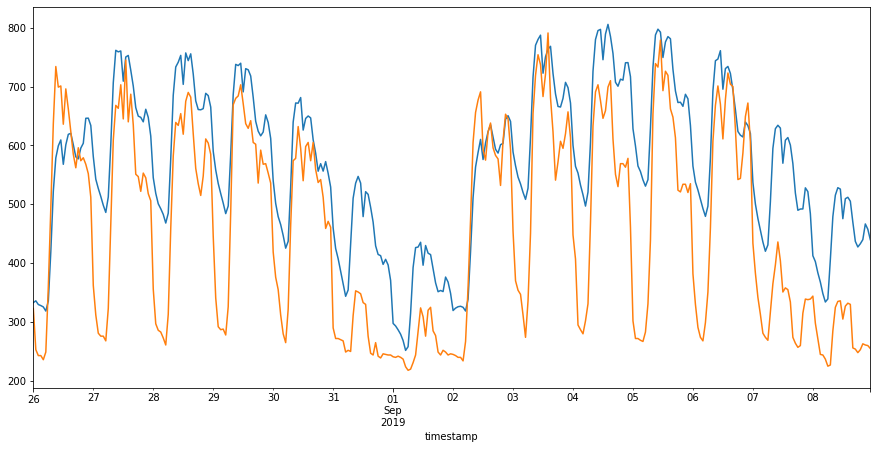

In [394]:
test_ts['arima'] = arima_model.predict(start='20190826', end='20190908230000', exog=exog_test)

p = 1
test_ts['inverse'] = 0
inv_col = test_ts.columns.get_loc('inverse')
test_ts.iloc[0, inv_col] = time_series['20190825'].iloc[-1]['fact']
for i in range(p, len(test_ts)):
    test_ts.iloc[i, inv_col] = test_ts.iloc[i]['arima'] + test_ts.iloc[i - p]['inverse']
    
test_ts.inverse.plot()
time_series.loc[test_ts.index].fact.plot()
mean_squared_error(test_ts.inverse, time_series.loc[test_ts.index].fact, squared=False)

<AxesSubplot:xlabel='timestamp'>

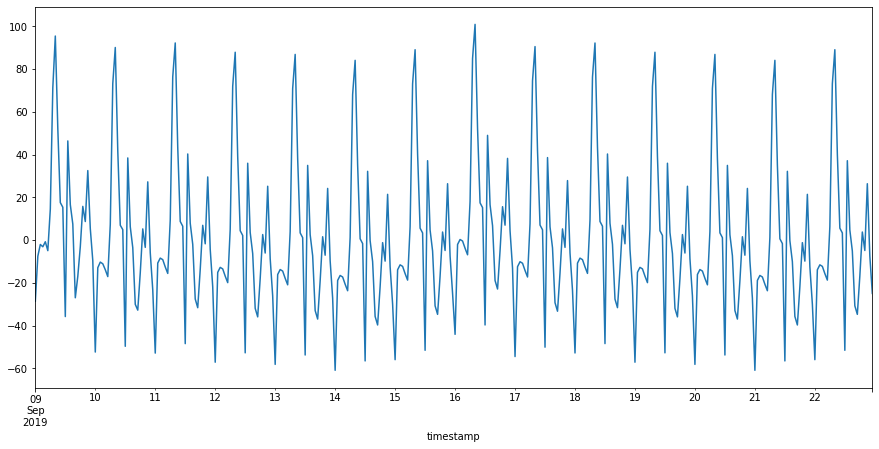

In [385]:
forecast_ts['arima'] = arima_model.predict(start='20190909', end='20190922230000', exog=exog_forecast)
forecast_ts.arima.plot()

<AxesSubplot:xlabel='timestamp'>

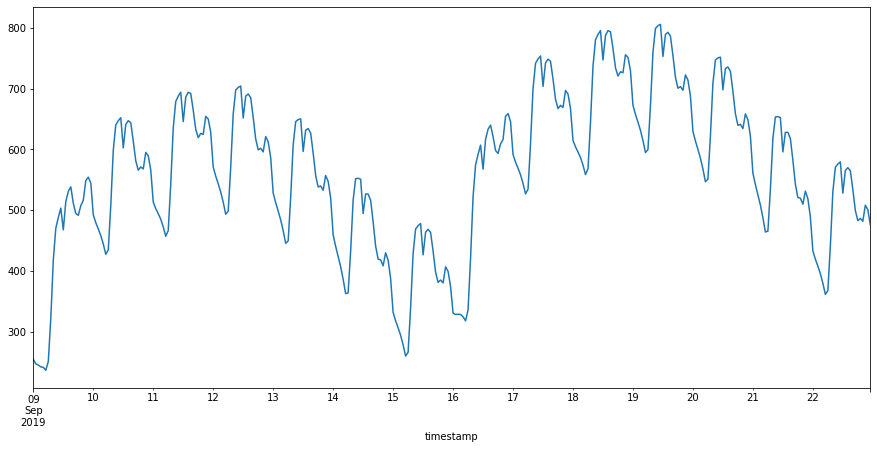

In [390]:
p = 1
forecast_ts['inverse'] = 0
inv_col = forecast_ts.columns.get_loc('inverse')
forecast_ts.iloc[0, inv_col] = time_series['2019-09-08'].iloc[-1]['fact']
for i in range(p, len(forecast_ts)):
    forecast_ts.iloc[i, inv_col] = forecast_ts.iloc[i]['arima'] + forecast_ts.iloc[i - p]['inverse']
    
forecast_ts.inverse.plot()